Example of Regression Analysis Using the Boston Housing Data Set: http://facweb.cs.depaul.edu/mobasher/classes/CSC478/Data/housing-dscr.txt

Source: http://facweb.cs.depaul.edu/mobasher/classes/CSC478/Notes/IPython%20Notebook%20-%20Regression.html

In [1]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.cross_validation import KFold
from sklearn.datasets import load_boston

import numpy as np
import pylab as pl

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
boston = load_boston()

In [3]:
boston

{'DESCR': "Boston House Prices dataset\n===========================\n\nNotes\n------\nData Set Characteristics:  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive\n    \n    :Median Value (attribute 14) is usually the target\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per

In [4]:
boston.data.shape

(506, 13)

In [5]:
boston.target.shape

(506,)

In [6]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], 
      dtype='<U7')

In [8]:
np.set_printoptions(precision=2, linewidth=120, suppress=True, edgeitems=4)

In [10]:
boston.data

array([[   0.01,   18.  ,    2.31,    0.  , ...,  296.  ,   15.3 ,  396.9 ,    4.98],
       [   0.03,    0.  ,    7.07,    0.  , ...,  242.  ,   17.8 ,  396.9 ,    9.14],
       [   0.03,    0.  ,    7.07,    0.  , ...,  242.  ,   17.8 ,  392.83,    4.03],
       [   0.03,    0.  ,    2.18,    0.  , ...,  222.  ,   18.7 ,  394.63,    2.94],
       ..., 
       [   0.05,    0.  ,   11.93,    0.  , ...,  273.  ,   21.  ,  396.9 ,    9.08],
       [   0.06,    0.  ,   11.93,    0.  , ...,  273.  ,   21.  ,  396.9 ,    5.64],
       [   0.11,    0.  ,   11.93,    0.  , ...,  273.  ,   21.  ,  393.45,    6.48],
       [   0.05,    0.  ,   11.93,    0.  , ...,  273.  ,   21.  ,  396.9 ,    7.88]])

In [11]:
# In order to do multiple regression we need to add a column of 1s for x0
x = np.array([np.concatenate((v,[1])) for v in boston.data])
y = boston.target

In [15]:
# First 10 elements of the data
x[:10]

array([[   0.01,   18.  ,    2.31,    0.  ,    0.54,    6.58,   65.2 ,    4.09,    1.  ,  296.  ,   15.3 ,  396.9 ,
           4.98,    1.  ],
       [   0.03,    0.  ,    7.07,    0.  ,    0.47,    6.42,   78.9 ,    4.97,    2.  ,  242.  ,   17.8 ,  396.9 ,
           9.14,    1.  ],
       [   0.03,    0.  ,    7.07,    0.  ,    0.47,    7.18,   61.1 ,    4.97,    2.  ,  242.  ,   17.8 ,  392.83,
           4.03,    1.  ],
       [   0.03,    0.  ,    2.18,    0.  ,    0.46,    7.  ,   45.8 ,    6.06,    3.  ,  222.  ,   18.7 ,  394.63,
           2.94,    1.  ],
       [   0.07,    0.  ,    2.18,    0.  ,    0.46,    7.15,   54.2 ,    6.06,    3.  ,  222.  ,   18.7 ,  396.9 ,
           5.33,    1.  ],
       [   0.03,    0.  ,    2.18,    0.  ,    0.46,    6.43,   58.7 ,    6.06,    3.  ,  222.  ,   18.7 ,  394.12,
           5.21,    1.  ],
       [   0.09,   12.5 ,    7.87,    0.  ,    0.52,    6.01,   66.6 ,    5.56,    5.  ,  311.  ,   15.2 ,  395.6 ,
          12.43,    1.  ],

In [17]:
# First 10 elements of the response variable
y[:10]

array([ 24. ,  21.6,  34.7,  33.4,  36.2,  28.7,  22.9,  27.1,  16.5,  18.9])

## Linear Regression

In [18]:
# Create linear regression object
linreg = LinearRegression()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
# Train the model using the training sets
linreg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
# Let's see predictions for the first 10 instances
linreg.predict(x[:10])

array([ 30.01,  25.03,  30.57,  28.61,  27.94,  25.26,  23.  ,  19.53,  11.52,  18.92])

In [23]:
# Compute RMSE on training data
# p = np.array([linreg.predict(xi) for xi in x])
p = linreg.predict(x)
# Now we can constuct a vector of errors
err = abs(p-y)

# Let's see the error on the first 10 predictions
err[:10]

array([ 6.01,  3.43,  4.13,  4.79,  8.26,  3.44,  0.1 ,  7.57,  4.98,  0.02])

In [24]:
# Dot product of error vector with itself gives us the sum of squared errors
total_error = np.dot(err,err)
# Compute RMSE
rmse_train = np.sqrt(total_error/len(p))
rmse_train

4.6795063006355164

In [26]:
# We can view the regression coefficients
print('Regression Coefficients: \n', linreg.coef_)

Regression Coefficients: 
 [ -0.11   0.05   0.02   2.69 -17.8    3.8    0.    -1.48   0.31  -0.01  -0.95   0.01  -0.53   0.  ]


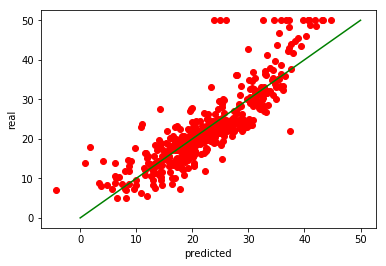

In [27]:
# Plot outputs
%matplotlib inline
pl.plot(p, y,'ro')
pl.plot([0,50],[0,50], 'g-')
pl.xlabel('predicted')
pl.ylabel('real')
pl.show()

In [34]:
# Now let's compute RMSE using 10-fold x-validation
kf = KFold(len(x), n_folds=10)
xval_err = 0
for train,test in kf:
    linreg.fit(x[train],y[train])
    # p = np.array([linreg.predict(xi) for xi in x[test]])
    p = linreg.predict(x[test])
    e = p-y[test]
    xval_err += np.dot(e,e)
    
rmse_10cv = np.sqrt(xval_err/len(x))
rmse_10cv

5.8819250724301071

In [35]:
method_name = 'Simple Linear Regression'
print('Method: %s' %method_name)
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on 10-fold CV: %.4f' %rmse_10cv)

Method: Simple Linear Regression
RMSE on training: 4.6857
RMSE on 10-fold CV: 5.8819


## Ridge Regression

In [31]:
# Create linear regression object with a ridge coefficient 0.5
ridge = Ridge(fit_intercept=True, alpha=0.5)

In [32]:
# Train the model using the training set
ridge.fit(x,y)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [33]:
# Compute RMSE on training data
# p = np.array([ridge.predict(xi) for xi in x])
p = ridge.predict(x)
err = p-y
total_error = np.dot(err,err)
rmse_train = np.sqrt(total_error/len(p))
rmse_train

4.6857079166774627

In [37]:
# Compute RMSE using 10-fold x-validation
kf = KFold(len(x), n_folds=10)
xval_err = 0
for train,test in kf:
    ridge.fit(x[train],y[train])
    p = ridge.predict(x[test])
    e = p-y[test]
    xval_err += np.dot(e,e)
rmse_10cv = np.sqrt(xval_err/len(x))
rmse_10cv

5.8428362247708749

In [38]:
method_name = 'Ridge Regression'
print('Method: %s' %method_name)
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on 10-fold CV: %.4f' %rmse_10cv)

Method: Ridge Regression
RMSE on training: 4.6857
RMSE on 10-fold CV: 5.8428


### try different values of alpha and observe the impact on x-validation RMSE

In [39]:
print('Ridge Regression')
print('alpha\t RMSE_train\t RMSE_10cv\n')
alpha = np.linspace(.01,20,50)
t_rmse = np.array([])
cv_rmse = np.array([])

for a in alpha:
    ridge = Ridge(fit_intercept=True, alpha=a)
    
    # computing the RMSE on training data
    ridge.fit(x,y)
    p = ridge.predict(x)
    err = p-y
    total_error = np.dot(err,err)
    rmse_train = np.sqrt(total_error/len(p))

    # computing RMSE using 10-fold cross validation
    kf = KFold(len(x), n_folds=10)
    xval_err = 0
    for train, test in kf:
        ridge.fit(x[train], y[train])
        p = ridge.predict(x[test])
        err = p - y[test]
        xval_err += np.dot(err,err)
    rmse_10cv = np.sqrt(xval_err/len(x))
    
    t_rmse = np.append(t_rmse, [rmse_train])
    cv_rmse = np.append(cv_rmse, [rmse_10cv])
    print('{:.3f}\t {:.4f}\t\t {:.4f}'.format(a,rmse_train,rmse_10cv))

Ridge Regression
alpha	 RMSE_train	 RMSE_10cv

0.010	 4.6795		 5.8806
0.418	 4.6842		 5.8467
0.826	 4.6921		 5.8319
1.234	 4.7000		 5.8234
1.642	 4.7070		 5.8175
2.050	 4.7133		 5.8126
2.458	 4.7187		 5.8082
2.866	 4.7234		 5.8041
3.274	 4.7276		 5.8000
3.682	 4.7313		 5.7960
4.090	 4.7346		 5.7920
4.498	 4.7375		 5.7880
4.906	 4.7402		 5.7840
5.313	 4.7426		 5.7800
5.721	 4.7448		 5.7760
6.129	 4.7469		 5.7720
6.537	 4.7488		 5.7680
6.945	 4.7505		 5.7641
7.353	 4.7522		 5.7602
7.761	 4.7537		 5.7563
8.169	 4.7552		 5.7524
8.577	 4.7565		 5.7485
8.985	 4.7578		 5.7447
9.393	 4.7591		 5.7410
9.801	 4.7603		 5.7372
10.209	 4.7614		 5.7335
10.617	 4.7625		 5.7298
11.025	 4.7635		 5.7262
11.433	 4.7646		 5.7226
11.841	 4.7655		 5.7190
12.249	 4.7665		 5.7155
12.657	 4.7674		 5.7120
13.065	 4.7683		 5.7086
13.473	 4.7692		 5.7052
13.881	 4.7700		 5.7018
14.289	 4.7708		 5.6985
14.697	 4.7717		 5.6952
15.104	 4.7724		 5.6919
15.512	 4.7732		 5.6887
15.920	 4.7740		 5.6856
16.328	 4.7747		 5

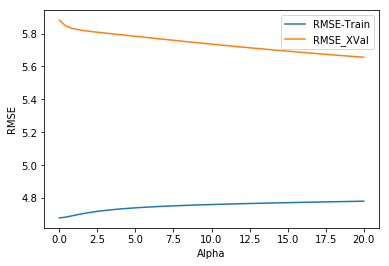

In [40]:
pl.plot(alpha, t_rmse, label='RMSE-Train')
pl.plot(alpha, cv_rmse, label='RMSE_XVal')
pl.legend( ('RMSE-Train', 'RMSE_XVal') )
pl.ylabel('RMSE')
pl.xlabel('Alpha')
pl.show()

## Comparisons regression methods
#### let's parametrize the regression methods


In [44]:
a = 0.3
for name,met in [
        ('linear regression', LinearRegression()),
        ('lasso', Lasso(fit_intercept=True, alpha=a)),
        ('ridge', Ridge(fit_intercept=True, alpha=a)),
        ('elastic-net', ElasticNet(fit_intercept=True, alpha=a))
        ]:
    met.fit(x,y)
    # p = np.array([met.predict(xi) for xi in x])
    p = met.predict(x)
    e = p-y
    total_error = np.dot(e,e)
    rmse_train = np.sqrt(total_error/len(p))

    kf = KFold(len(x), n_folds=10)
    err = 0
    for train,test in kf:
        met.fit(x[train],y[train])
        p = met.predict(x[test])
        e = p-y[test]
        err += np.dot(e,e)

    rmse_10cv = np.sqrt(err/len(x))
    print('Method: %s' %name)
    print('RMSE on training: %.4f' %rmse_train)
    print('RMSE on 10-fold CV: %.4f' %rmse_10cv)
    print('\n')

Method: linear regression
RMSE on training: 4.6795
RMSE on 10-fold CV: 5.8819


Method: lasso
RMSE on training: 4.8570
RMSE on 10-fold CV: 5.7675


Method: ridge
RMSE on training: 4.6822
RMSE on 10-fold CV: 5.8535


Method: elastic-net
RMSE on training: 4.9072
RMSE on 10-fold CV: 5.4936


